In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('/hungarian.csv', delimiter=' ', header=None)

In [3]:
# Set the column names
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
# Data Exploration

# Display the first few rows
print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  40.0  1.0  2.0     140.0  289.0  0.0      0.0    172.0    0.0      0.0   
1  49.0  0.0  3.0     160.0  180.0  0.0      0.0    156.0    0.0      1.0   
2  37.0  1.0  2.0     130.0  283.0  0.0      1.0     98.0    0.0      0.0   
3  48.0  0.0  4.0     138.0  214.0  0.0      0.0    108.0    1.0      1.5   
4  54.0  1.0  3.0     150.0   -9.0  0.0      0.0    122.0    0.0      0.0   

   slope   ca  thal  target  
0   -9.0 -9.0  -9.0     0.0  
1    2.0 -9.0  -9.0     1.0  
2   -9.0 -9.0  -9.0     0.0  
3    2.0 -9.0  -9.0     3.0  
4   -9.0 -9.0  -9.0     0.0  


In [5]:
# Describe the dataset
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000   
mean    47.826531    0.724490    2.982993  132.102041  230.520408   -0.176871   
std      7.811812    0.447533    0.965117   19.437564   95.414336    1.499491   
min     28.000000    0.000000    1.000000   -9.000000   -9.000000   -9.000000   
25%     42.000000    0.000000    2.000000  120.000000  198.000000    0.000000   
50%     49.000000    1.000000    3.000000  130.000000  237.000000    0.000000   
75%     54.000000    1.000000    4.000000  140.000000  277.000000    0.000000   
max     66.000000    1.000000    4.000000  200.000000  603.000000    1.000000   

          restecg    thalach       exang     oldpeak       slope          ca  \
count  294.000000  294.00000  294.000000  294.000000  294.000000  294.000000   
mean     0.187075  138.62585    0.272109    0.586054   -5.146259   -8.846939   
std      0.707616   25.08408  

In [6]:
# Information of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    float64
 11  ca        294 non-null    float64
 12  thal      294 non-null    float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.4 KB
None


In [7]:
# Data Cleaning: Checking for missing values
print(data.isnull().sum())

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
target      1
dtype: int64


In [8]:
# Fill missing values with median
data.fillna(data.median(), inplace=True)

In [9]:
# Renaming columns and mapping target values
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data['target'] = data.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data['sex'] = data.sex.map({0: 'female', 1: 'male'})
data['thal'] = data.thal.fillna(data.thal.mean())
data['ca'] = data.ca.fillna(data.ca.mean())

In [10]:
# Ensure all columns are numeric
data['sex'] = data.sex.map({'female': 0, 'male': 1})
data = data.apply(pd.to_numeric)

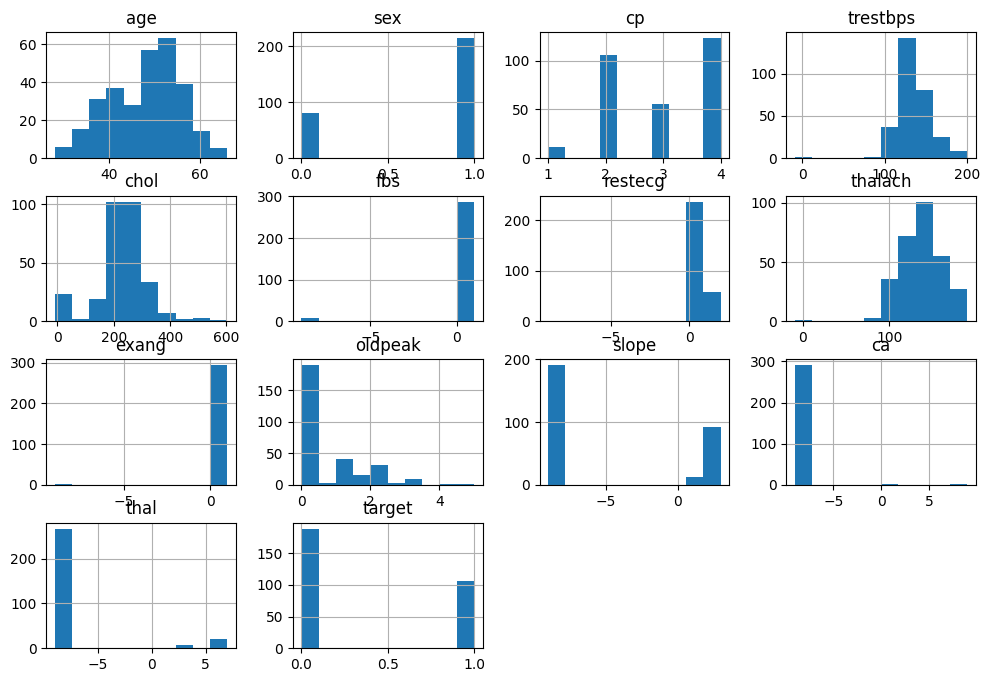

In [11]:
# Data Visualization

# Histogram
data.hist(bins=10, figsize=(12,8))
plt.show()

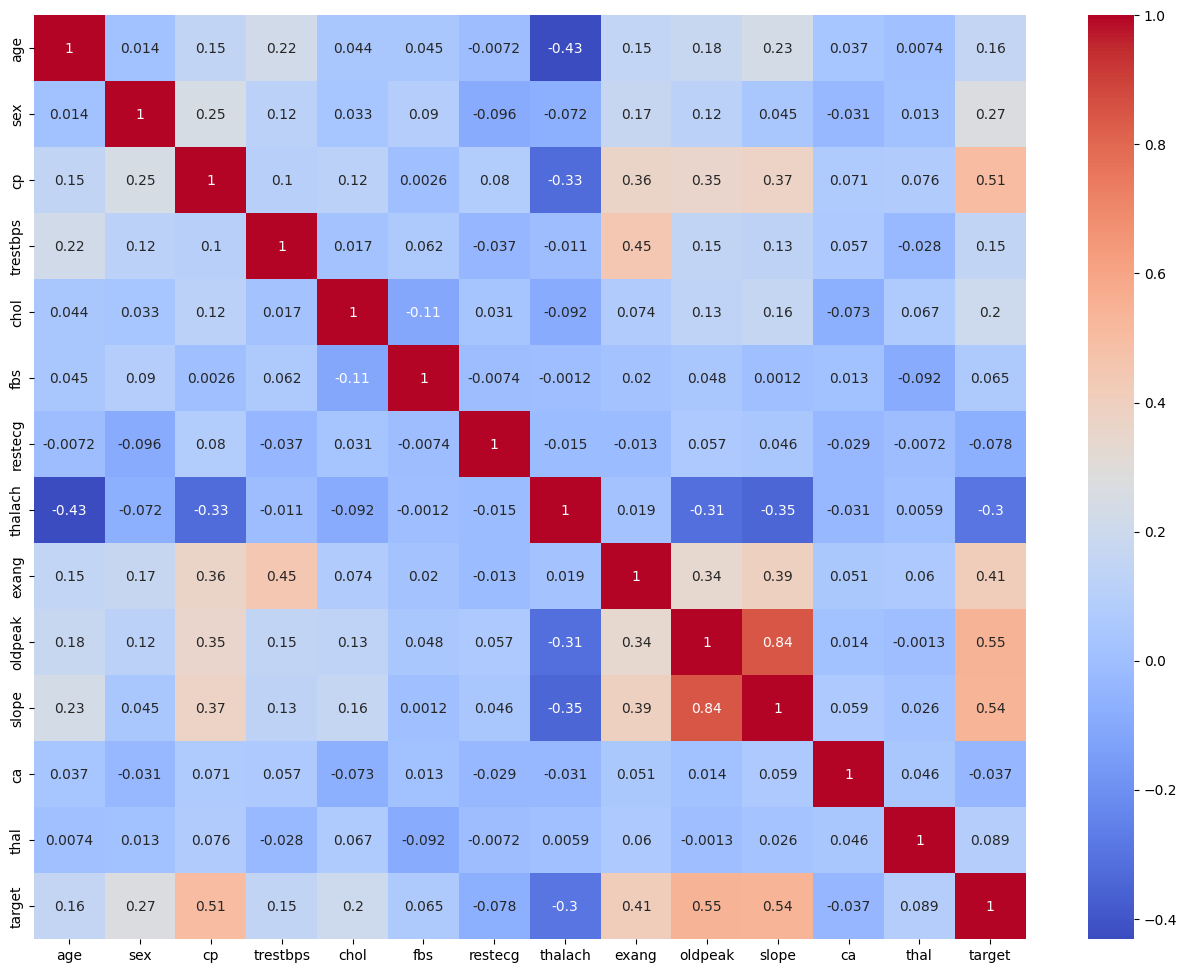

In [12]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

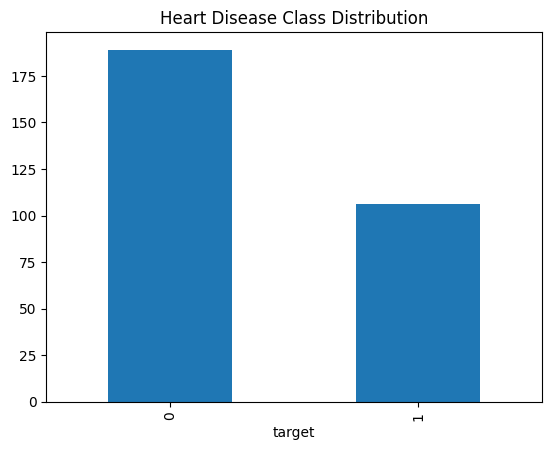

In [13]:
# Count plot of the target variable
data['target'].value_counts().plot(kind='bar', title='Heart Disease Class Distribution')
plt.show()

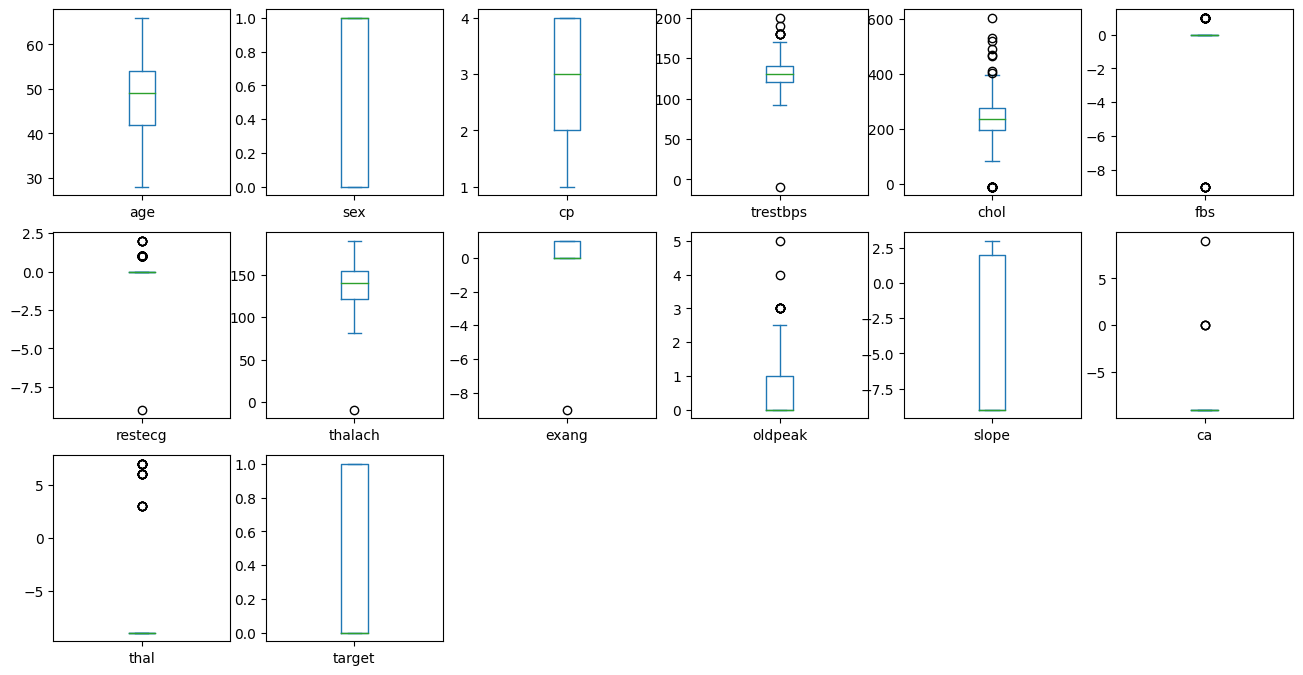

In [14]:
# Box plot
data.plot(kind='box', subplots=True, layout=(5, 6), sharex=False, sharey=False, figsize=(16, 14))
plt.show()

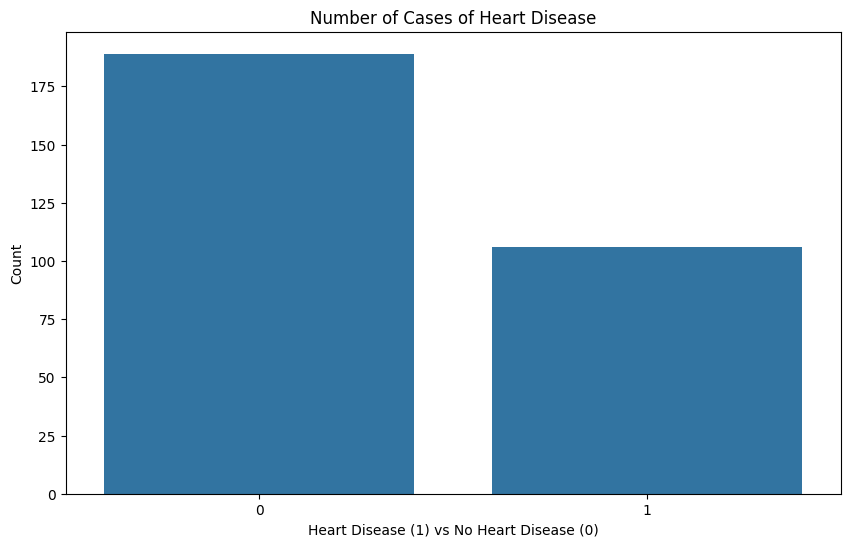

In [15]:
# Bar plot of target variable distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=data['target'].value_counts().index, y=data['target'].value_counts().values)
plt.title('Number of Cases of Heart Disease')
plt.ylabel('Count')
plt.xlabel('Heart Disease (1) vs No Heart Disease (0)')
plt.show()

In [16]:
# Removing outliers
print(f"Original data shape: {data.shape}")
from scipy import stats
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
print(f"Data shape after removing outliers: {data.shape}")

Original data shape: (295, 14)
Data shape after removing outliers: (257, 14)


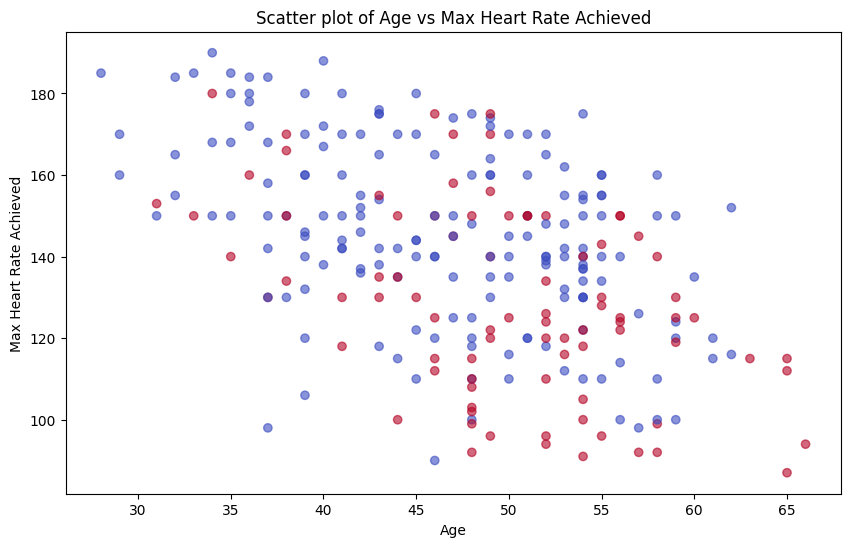

In [17]:
# Scatter plot after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['thalach'], c=data['target'], cmap='coolwarm', alpha=0.6)
plt.title('Scatter plot of Age vs Max Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.show()

In [18]:
# Split the dataset into features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [19]:
# Splitting the data into features and target
X = data.drop('target', axis=1)
y = data['target']

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((205, 13), (52, 13), (205,), (52,))

In [22]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# List of models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

In [24]:
# Training and evaluating each model
accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Logistic Regression Accuracy: 0.81
[[33  2]
 [ 8  9]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        35
           1       0.82      0.53      0.64        17

    accuracy                           0.81        52
   macro avg       0.81      0.74      0.76        52
weighted avg       0.81      0.81      0.79        52

------------------------------------------------------------
Support Vector Machine Accuracy: 0.83
[[33  2]
 [ 7 10]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.83      0.59      0.69        17

    accuracy                           0.83        52
   macro avg       0.83      0.77      0.78        52
weighted avg       0.83      0.83      0.82        52

------------------------------------------------------------
K-Nearest Neighbors Accuracy: 0.83
[[33  2]
 [ 7 10]]
              precision    recall  f1-score   support

    

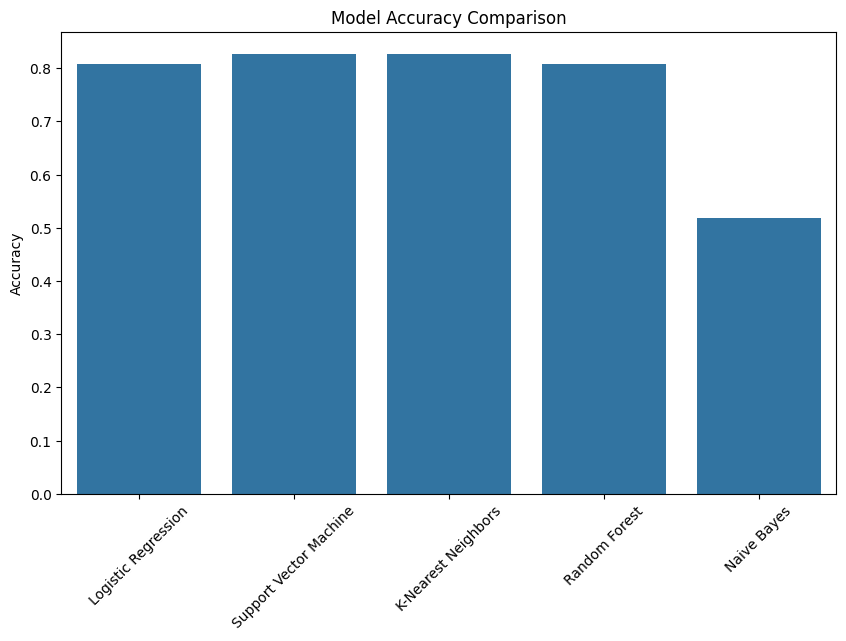

In [25]:
# Bar graph after evaluating accuracy of each model
model_names, model_accuracies = zip(*accuracies)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_names), y=list(model_accuracies))
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Example: Predicting with the best model
best_model = SVC(probability=True)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.2f}")

Best Model Accuracy: 0.83


In [27]:
# Remove the target variable from sample data
sample_data = np.array([63, 1, 4, 150, 223, 0, 0, 115, 0, 0, -9, -9, -9]).reshape(1, -1)
sample_data_scaled = scaler.transform(sample_data)
prediction = best_model.predict(sample_data_scaled)

In [28]:
# Mapping the prediction to readable output
outcome_map = {0: 'No Heart Disease', 1: 'Heart Disease'}
predicted_outcome = outcome_map[prediction[0]]
print(f"Predicted Outcome: {predicted_outcome}")

Predicted Outcome: No Heart Disease
